<a href="https://colab.research.google.com/github/raagav456/FakeNewsDetection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Basic Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#Loading the DataSet

In [ ]:
train_df = pd.read_csv('news.csv')

In [ ]:
train_df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


<Axes: xlabel='label', ylabel='count'>

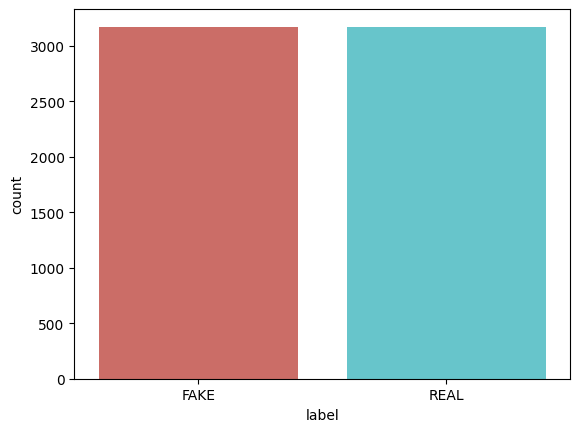

In [ ]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

create_distribution(train_df)

#Pre-Processing the Data

In [ ]:
train_df = train_df.dropna()

In [ ]:
train_df.reset_index(drop= True,inplace=True)

In [ ]:
label_train = train_df.label

In [ ]:
train_df = train_df.drop("label", axis = 1)

In [ ]:
train_df.head(10)

,Unnamed: 0,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ..."
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o..."
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...


#Creating the Bag-Of-Words

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

all_stopwords = list(stopwords.words('english'))
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

corpus = []
for i in range(0, len(train_df)):
  review = re.sub('[^a-zA-Z]', ' ', train_df['text'][i])
  review = review.lower()
  review = review.split()
  lemmatizer = WordNetLemmatizer()
  review = [lemmatizer.lemmatize(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
  train_df['text'][i] = review 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-36-cbdf90b88bde>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['text'][i] = review


#Spitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_df['text'], label_train, test_size=0.3, random_state=1)

#Transforming the Data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

#Trainning the model

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(tfidf_X_train,Y_train)

SVC(kernel='linear', random_state=0)

#Confusion Matrix and Accuracy

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):  
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)
  cm_display.plot()
  plt.show()

Accuracy: 93.74%


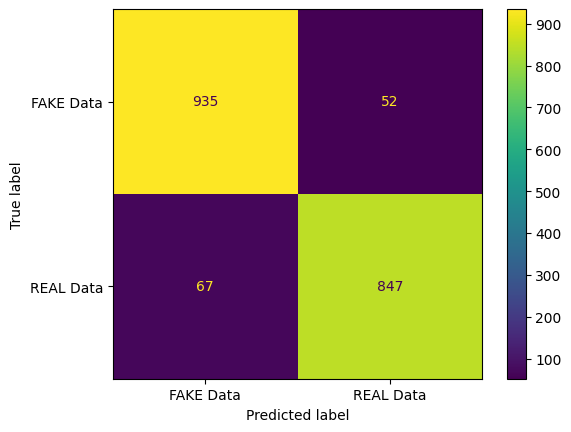

In [ ]:
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100, 2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [ ]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [ ]:
fake_news_det("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [ ]:
fake_news_det('''U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.''')

['REAL']
